In [3]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos 
sns.set(style="whitegrid")
sns.set_palette("pastel")

# Cargar los datos (usando la ruta correcta)
file_path = '../data/processed/merged_clean.csv'
df = pd.read_csv(file_path)

 # Mostar las primeras filas del DataFrame
print(df.head())

         Flower     Color  Stems  Year  Month  Day
0  Alstroemeria  Assorted    372  2021      3   21
1  Alstroemeria  Assorted    480  2021      6    9
2  Alstroemeria  Assorted    120  2022      8    3
3  Alstroemeria  Assorted     50  2022     12   30
4  Alstroemeria  Assorted    550  2023      3   30


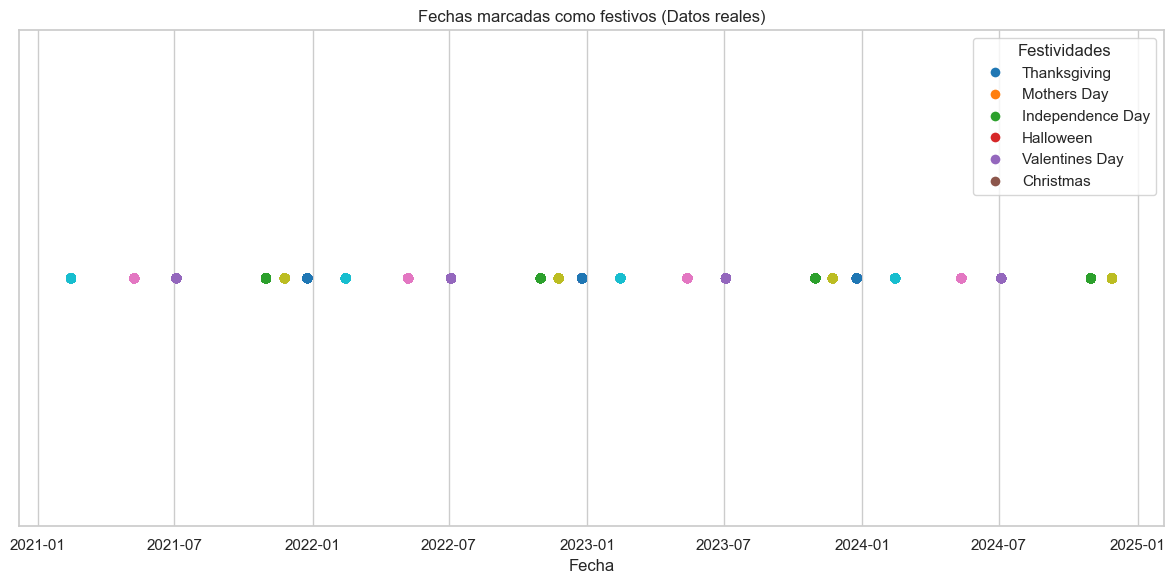

{'christmas': [Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('2021-12-25 00:00:00'),
  Timestamp('20

In [7]:
# Mostrar los días exactos de cada festividad en consola y mejorar visualmente la gráfica
# Verificar si 'df' existe y tiene la columna 'Date'
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Verificar si df existe
if 'df' not in globals():
    # Si no existe df, creamos un dataframe de ejemplo con rango de fechas
    start_date = '2019-01-01'
    end_date = '2022-12-31'
    df = pd.DataFrame({'Date': pd.date_range(start=start_date, end=end_date)})

# Asegurarse que 'Date' es de tipo datetime
if 'Date' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Date']):
    df['Date'] = pd.to_datetime(df['Date'])
elif 'Date' not in df.columns:
    print("El DataFrame no contiene la columna 'Date'. Por favor, verifica tus datos.")
    # Intentar crear una columna Date si hay otras columnas de fecha disponibles
    if all(col in df.columns for col in ['Year', 'Month', 'Day']):
        df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
    else:
        raise KeyError("No se puede crear la columna 'Date'. Faltan columnas de año, mes o día.")

# Extraer año, mes y día si no están presentes
if 'Year' not in df.columns:
    df['Year'] = df['Date'].dt.year
if 'Month' not in df.columns:
    df['Month'] = df['Date'].dt.month
if 'Day' not in df.columns:
    df['Day'] = df['Date'].dt.day

# Verificar si marked_dates existe ya, si no, crear aplicando add_holiday_markers
if 'marked_dates' not in globals():
    # Función para marcar las festividades (usando la función que está en la celda siguiente)
    def add_holiday_markers(df):
        df_with_holidays = df.copy()
        holidays = ['valentines_day', 'mothers_day', 'independence_day', 'halloween', 'thanksgiving', 'christmas']
        for holiday in holidays:
            df_with_holidays[holiday] = False
        
        def get_mothers_day(year):
            first = datetime(year, 5, 1)
            first_sunday = first + timedelta(days=(6 - first.weekday()) % 7)
            return first_sunday + timedelta(days=7)
        
        def get_thanksgiving(year):
            first = datetime(year, 11, 1)
            first_thursday = first + timedelta(days=(3 - first.weekday()) % 7)
            return first_thursday + timedelta(days=21)
        
        years = df_with_holidays['Year'].unique()
        
        for year in years:
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 2) & 
                                (df_with_holidays['Day'] == 14), 'valentines_day'] = True
            
            mothers_day = get_mothers_day(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == mothers_day), 'mothers_day'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 7) & 
                                (df_with_holidays['Day'] == 4), 'independence_day'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 10) & 
                                (df_with_holidays['Day'] == 31), 'halloween'] = True
            
            thanksgiving = get_thanksgiving(year)
            df_with_holidays.loc[(df_with_holidays['Date'] == thanksgiving), 'thanksgiving'] = True
            
            df_with_holidays.loc[(df_with_holidays['Year'] == year) & 
                                (df_with_holidays['Month'] == 12) & 
                                (df_with_holidays['Day'] == 25), 'christmas'] = True
        
        return df_with_holidays

    # Aplicar las marcas de festividades
    df_holidays = add_holiday_markers(df)
    
    # Crear un DataFrame con las fechas y sus nombres de festividades
    marked_dates = df_holidays[df_holidays[['valentines_day', 'mothers_day', 'independence_day', 
                                           'halloween', 'thanksgiving', 'christmas']].any(axis=1)].copy()
    
    def get_holiday_name(row):
        for col in ['valentines_day', 'mothers_day', 'independence_day', 'halloween', 'thanksgiving', 'christmas']:
            if row[col]:
                return col
        return None
    
    marked_dates['holiday'] = marked_dates.apply(get_holiday_name, axis=1)

# Mostrar días exactos
marked_dates_sorted = marked_dates[['holiday', 'Date']].sort_values('Date')
holiday_dates_by_name = marked_dates_sorted.groupby('holiday')['Date'].apply(list).to_dict()

# Visualización mejorada con etiquetas
plt.figure(figsize=(12, 6))
scatter = plt.scatter(marked_dates['Date'], [1]*len(marked_dates), 
                      c=marked_dates['holiday'].astype('category').cat.codes, 
                      cmap='tab10')

plt.yticks([])
plt.title("Fechas marcadas como festivos (Datos reales)")
plt.xlabel("Fecha")
plt.grid(True, axis='x')

# Crear leyenda con colores asignados
unique_holidays = marked_dates['holiday'].unique()
legend_elements = [
    plt.Line2D([0], [0], marker='o', color='w', label=holiday.replace('_', ' ').title(), 
               markerfacecolor=plt.cm.tab10(i), markersize=8)
    for i, holiday in enumerate(unique_holidays)
]
plt.legend(handles=legend_elements, title="Festividades")

plt.tight_layout()
plt.show()

# Mostrar por consola los días exactos de cada festividad
holiday_dates_by_name


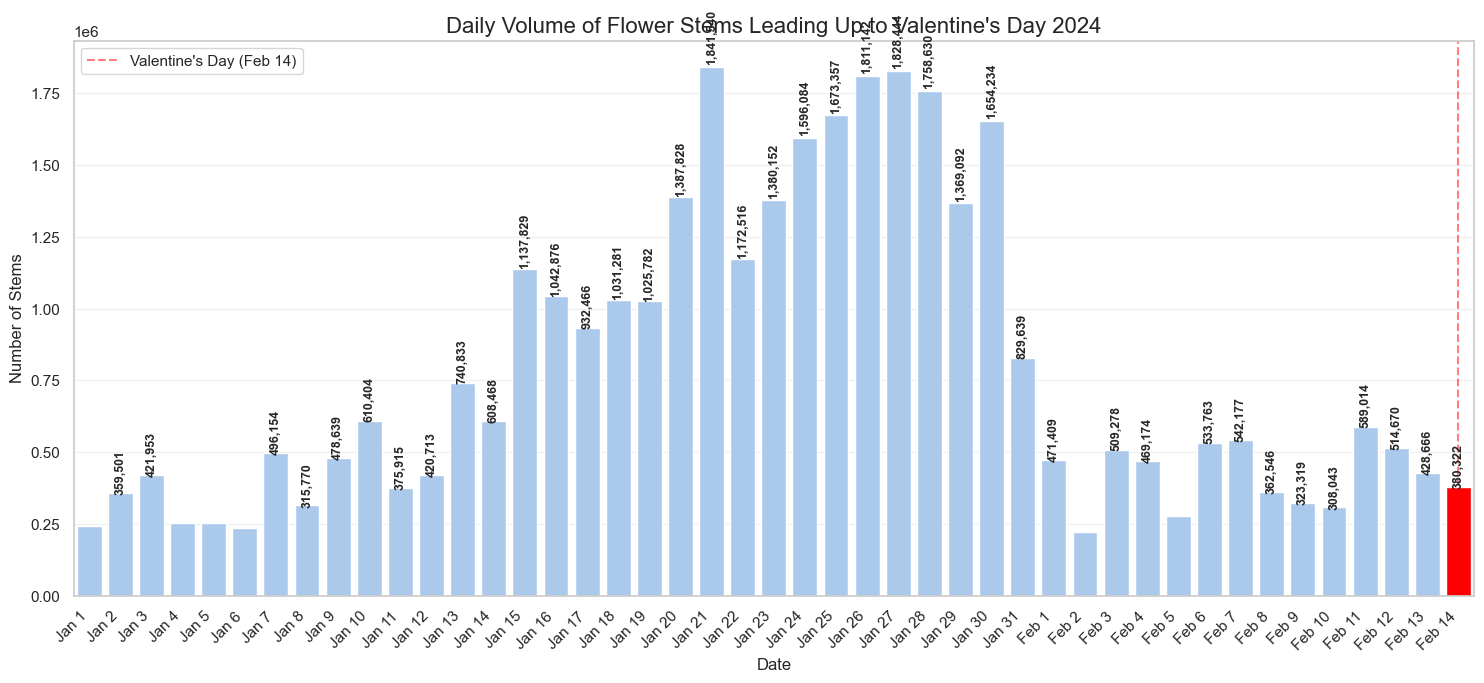

In [ ]:

# Filter data for the period from January 1, 2024 to February 14, 2024
valentine_period_2024 = df[(df['Year'] == 2024) & 
                          (((df['Month'] == 1)) | 
                           ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Group by date and sum the Stems
daily_stems_valentine = valentine_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_valentine['date'] = pd.to_datetime('2024-' + 
                                           daily_stems_valentine['Month'].astype(str).str.zfill(2) + '-' + 
                                           daily_stems_valentine['Day'].astype(str).str.zfill(2))
daily_stems_valentine = daily_stems_valentine.sort_values('date')

# Plot the daily volume of stems during the Valentine's period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_valentine)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_valentine['date']]
plt.xticks(range(len(daily_stems_valentine)), date_labels, rotation=45, ha='right')

# Highlight Valentine's Day
valentine_idx = daily_stems_valentine[
    (daily_stems_valentine['Month'] == 2) & 
    (daily_stems_valentine['Day'] == 14)
].index

if not valentine_idx.empty:
    valentine_idx = valentine_idx[0]
    ax.patches[valentine_idx].set_facecolor('red')

# Add text labels for peaks
for i, v in enumerate(daily_stems_valentine['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Valentine\'s Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Valentine's Day
if isinstance(valentine_idx, (int, np.integer)):
    plt.axvline(x=valentine_idx, color='red', linestyle='--', alpha=0.5, label="Valentine's Day (Feb 14)")

plt.legend()
plt.tight_layout()
plt.show()

Columns available: ['Flower', 'Color', 'Stems', 'Year', 'Month', 'Day', 'Date']


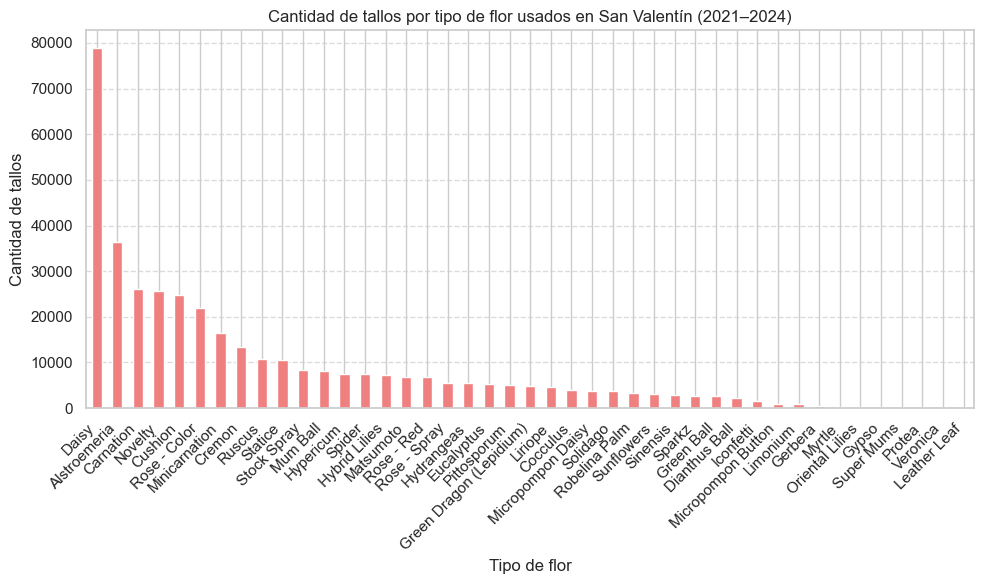

In [10]:
# Analizar los datos de San Valentín 2024 para ver qué tipo de flores se usaron más
flower_column = 'Flower'  

# Filtrar las fechas que son San Valentín
if 'df_holidays' in globals():
	valentines_data = df_holidays[df_holidays['valentines_day'] == True]

# Verificar que valentine_period_2024 ya existe (debería haber sido definido en la celda 2)
print("Columns available:", df.columns.tolist())

# Verificar si valentine_period_2024 existe, si no, crearlo
if 'valentine_period_2024' not in globals():
	# Filter data for the period from January 1, 2024 to February 14, 2024
	valentine_period_2024 = df[(df['Year'] == 2024) & 
							  (((df['Month'] == 1)) | 
							   ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Filtramos solo los datos de San Valentín 2024
valentine_day_data = valentine_period_2024[(valentine_period_2024['Month'] == 2) & (valentine_period_2024['Day'] == 14)]

# Agrupar por tipo de flor y sumar los tallos
stems_by_flower_valentine = valentine_day_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False)

# Visualización
plt.figure(figsize=(10, 6))
stems_by_flower_valentine.plot(kind='bar', color='lightcoral')
plt.title("Cantidad de tallos por tipo de flor usados en San Valentín (2021–2024)")
plt.ylabel("Cantidad de tallos")
plt.xlabel("Tipo de flor")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.show()

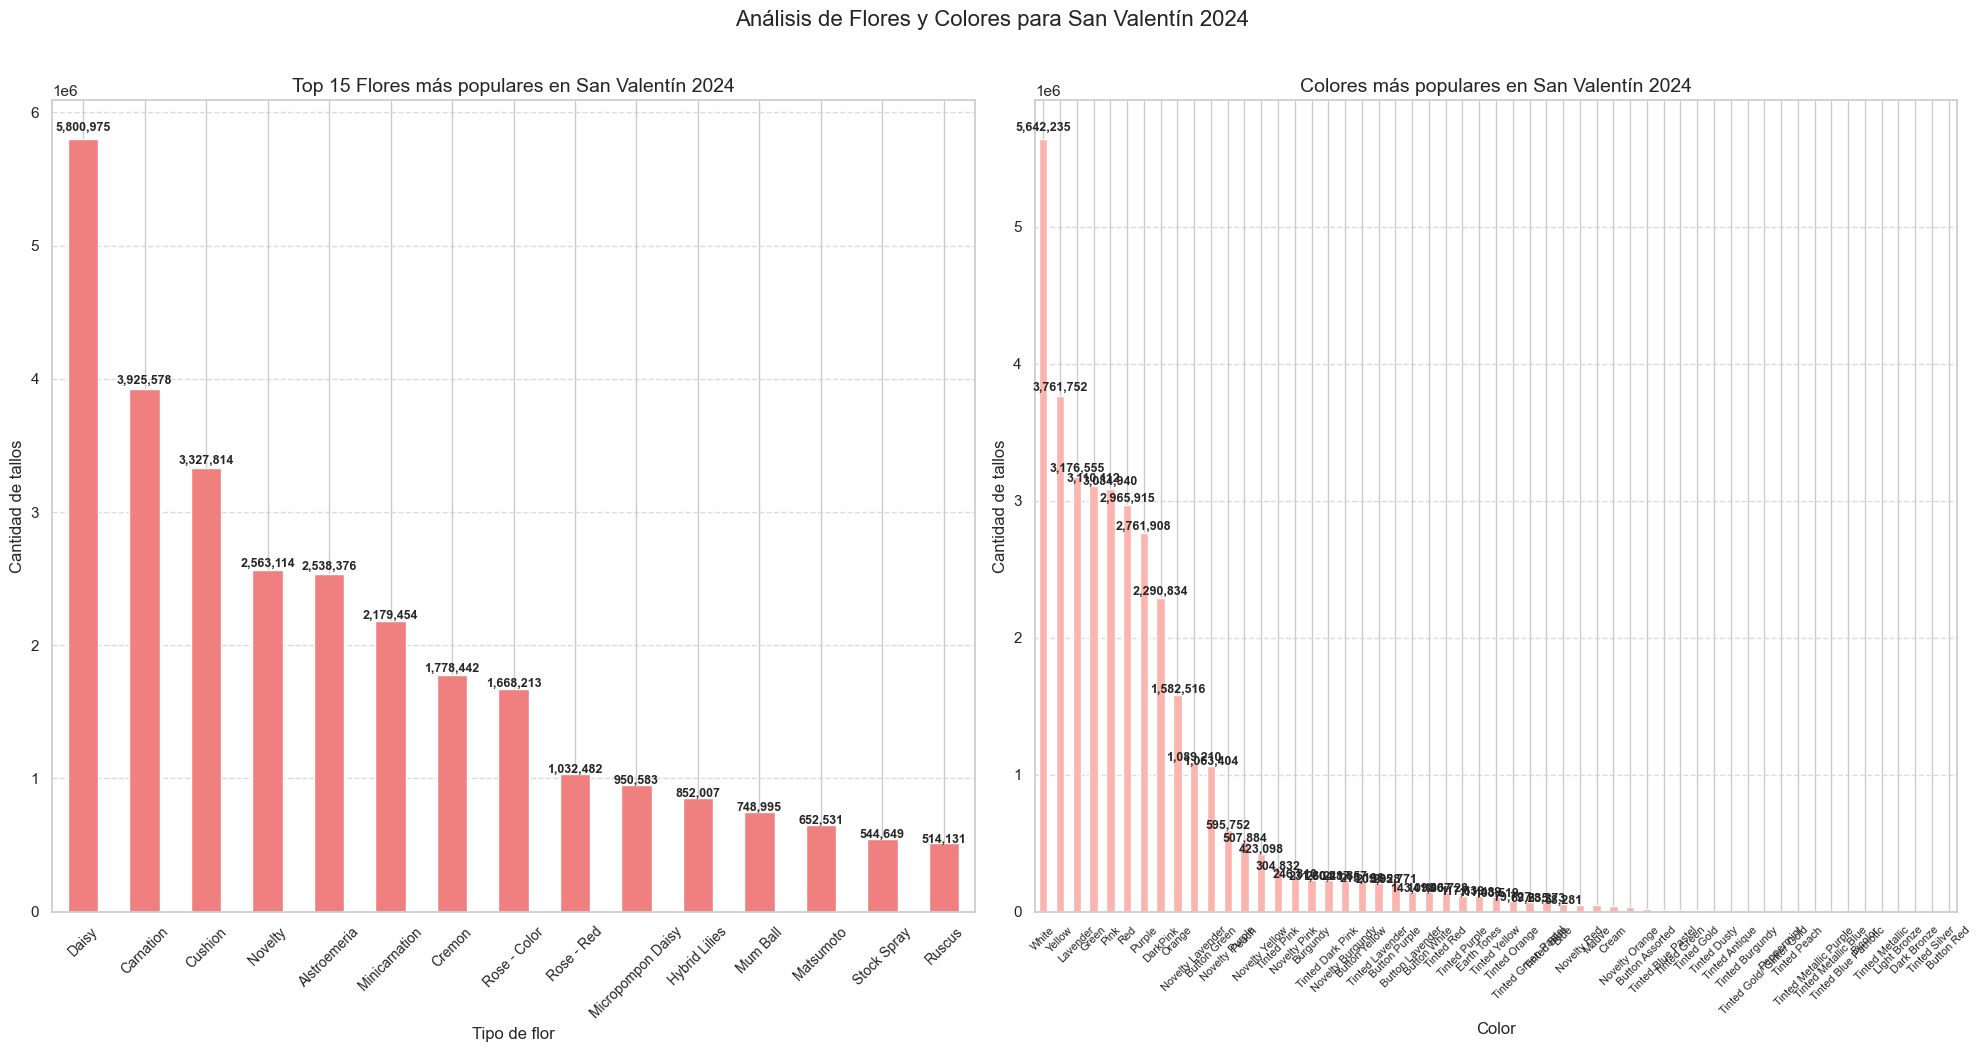

In [13]:
# Analizar los tipos de flores y colores utilizados en San Valentín 2024

# Primero definimos el periodo de San Valentín de 2024 si no existe
if 'valentine_period_2024' not in globals():
    # Filter data for the period from January 1, 2024 to February 14, 2024
    valentine_period_2024 = df[(df['Year'] == 2024) & 
                              (((df['Month'] == 1)) | 
                               ((df['Month'] == 2) & (df['Day'] <= 14)))]

# Agrupar por color y sumar los tallos
stems_by_color = valentine_period_2024.groupby('Color')['Stems'].sum().sort_values(ascending=False)

# Agrupar por tipo de flor y sumar los tallos
stems_by_flower_valentine = valentine_period_2024.groupby('Flower')['Stems'].sum().sort_values(ascending=False)

# Crear un gráfico con dos subplots: Flores y Colores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot para las flores (Top 15)
top_flowers = stems_by_flower_valentine.head(15)
top_flowers.plot(kind='bar', color='lightcoral', ax=ax1)
ax1.set_title("Top 15 Flores más populares en San Valentín 2024", fontsize=14)
ax1.set_ylabel("Cantidad de tallos")
ax1.set_xlabel("Tipo de flor")
ax1.tick_params(axis='x', rotation=45, labelsize=10)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Plot para los colores
stems_by_color.plot(kind='bar', colormap='Pastel1', ax=ax2)
ax2.set_title("Colores más populares en San Valentín 2024", fontsize=14)
ax2.set_ylabel("Cantidad de tallos")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=45, labelsize=8)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas a las barras más altas
for i, v in enumerate(top_flowers):
    if v > 20000:
        ax1.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

for i, v in enumerate(stems_by_color):
    if v > 50000:
        ax2.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

plt.tight_layout()
plt.suptitle("Análisis de Flores y Colores para San Valentín 2024", fontsize=16, y=1.05)
plt.show()

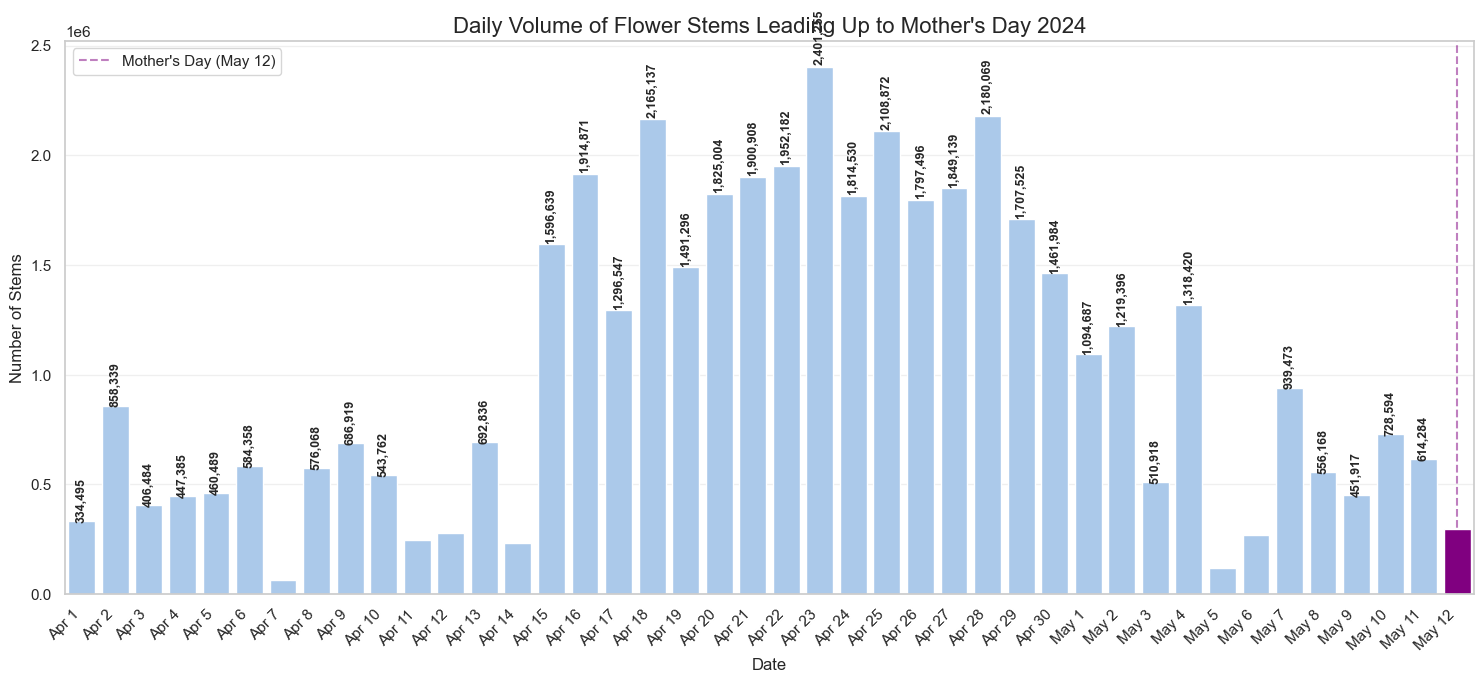

In [15]:
import numpy as np

# Filtrar datos para el período previo al Día de la Madre 2024 (abril y mayo)
mothers_day_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 4) | 
                            (df['Month'] == 5) & (df['Day'] <= 12))]

# Encontrar la fecha exacta del Día de la Madre 2024
mothers_day_date = None
for date in holiday_dates_by_name['mothers_day']:
    if date.year == 2024:
        mothers_day_date = date
        break

# Group by date and sum the Stems
daily_stems_mothers = mothers_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_mothers['date'] = pd.to_datetime('2024-' + 
                                        daily_stems_mothers['Month'].astype(str).str.zfill(2) + '-' + 
                                        daily_stems_mothers['Day'].astype(str).str.zfill(2))
daily_stems_mothers = daily_stems_mothers.sort_values('date')

# Plot the daily volume of stems during the Mother's Day period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_mothers)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_mothers['date']]
plt.xticks(range(len(daily_stems_mothers)), date_labels, rotation=45, ha='right')

# Highlight Mother's Day
if mothers_day_date:
    mothers_day_idx = daily_stems_mothers[
        (daily_stems_mothers['Month'] == mothers_day_date.month) & 
        (daily_stems_mothers['Day'] == mothers_day_date.day)
    ].index
    
    if not mothers_day_idx.empty:
        mothers_day_idx = mothers_day_idx[0]
        ax.patches[mothers_day_idx].set_facecolor('purple')

# Add text labels for peaks
for i, v in enumerate(daily_stems_mothers['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Mother\'s Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Mother's Day
if mothers_day_date and isinstance(mothers_day_idx, (int, np.integer)):
    plt.axvline(x=mothers_day_idx, color='purple', linestyle='--', alpha=0.5, label="Mother's Day (May 12)")

plt.legend()
plt.tight_layout()
plt.show()

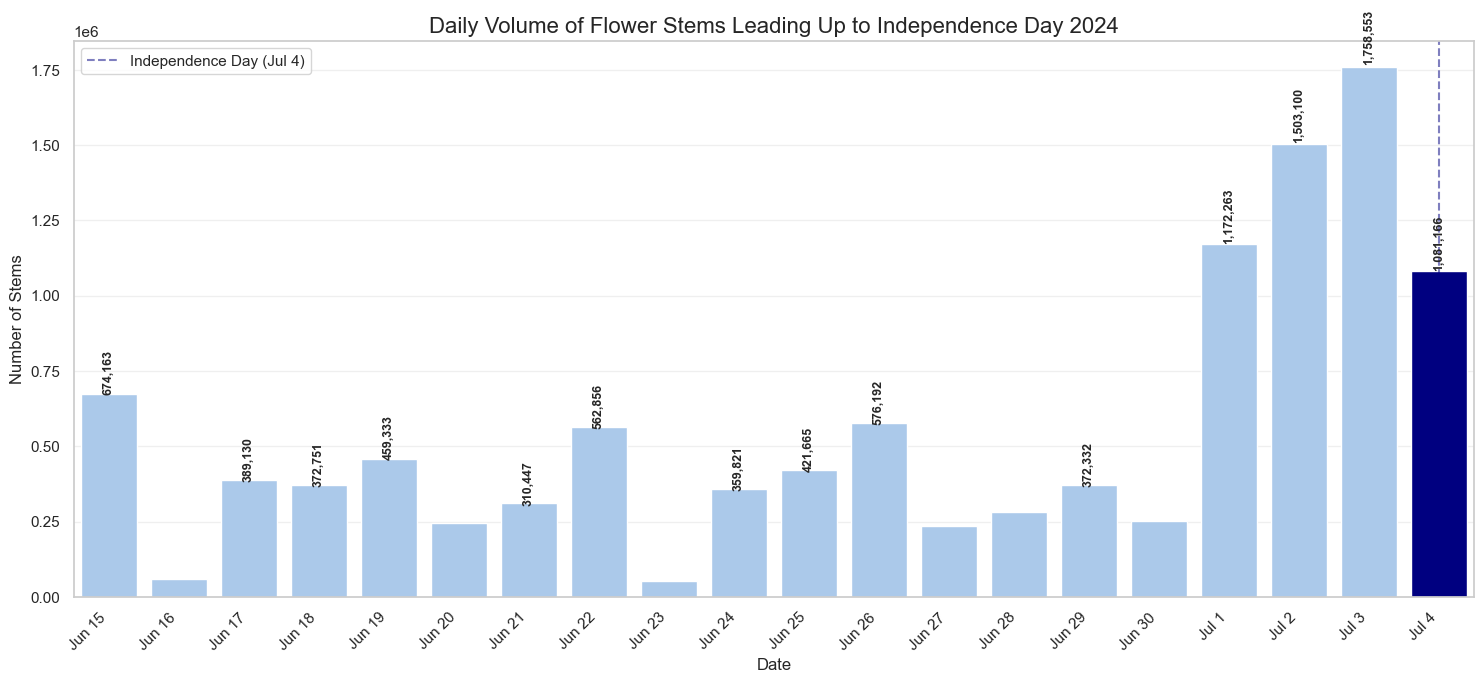

In [17]:
# Filter data for the period around Independence Day 2024 (June 15 to July 4)
independence_day_period_2024 = df[(df['Year'] == 2024) & 
                               ((df['Month'] == 6) & (df['Day'] >= 15)) | 
                               ((df['Month'] == 7) & (df['Day'] <= 4))]

# Group by date and sum the Stems
daily_stems_independence = independence_day_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_independence['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_independence['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_independence['Day'].astype(str).str.zfill(2))
daily_stems_independence = daily_stems_independence.sort_values('date')

# Plot the daily volume of stems during the Independence Day period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_independence)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_independence['date']]
plt.xticks(range(len(daily_stems_independence)), date_labels, rotation=45, ha='right')

# Highlight Independence Day
independence_idx = daily_stems_independence[
    (daily_stems_independence['Month'] == 7) & 
    (daily_stems_independence['Day'] == 4)
].index

if len(independence_idx) > 0:
    independence_idx = independence_idx[0]
    ax.patches[independence_idx].set_facecolor('navy')

# Add text labels for peaks
for i, v in enumerate(daily_stems_independence['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Independence Day 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Independence Day
if isinstance(independence_idx, (int, np.integer)):
    plt.axvline(x=independence_idx, color='navy', linestyle='--', alpha=0.5, label="Independence Day (Jul 4)")

plt.legend()
plt.tight_layout()
plt.show()

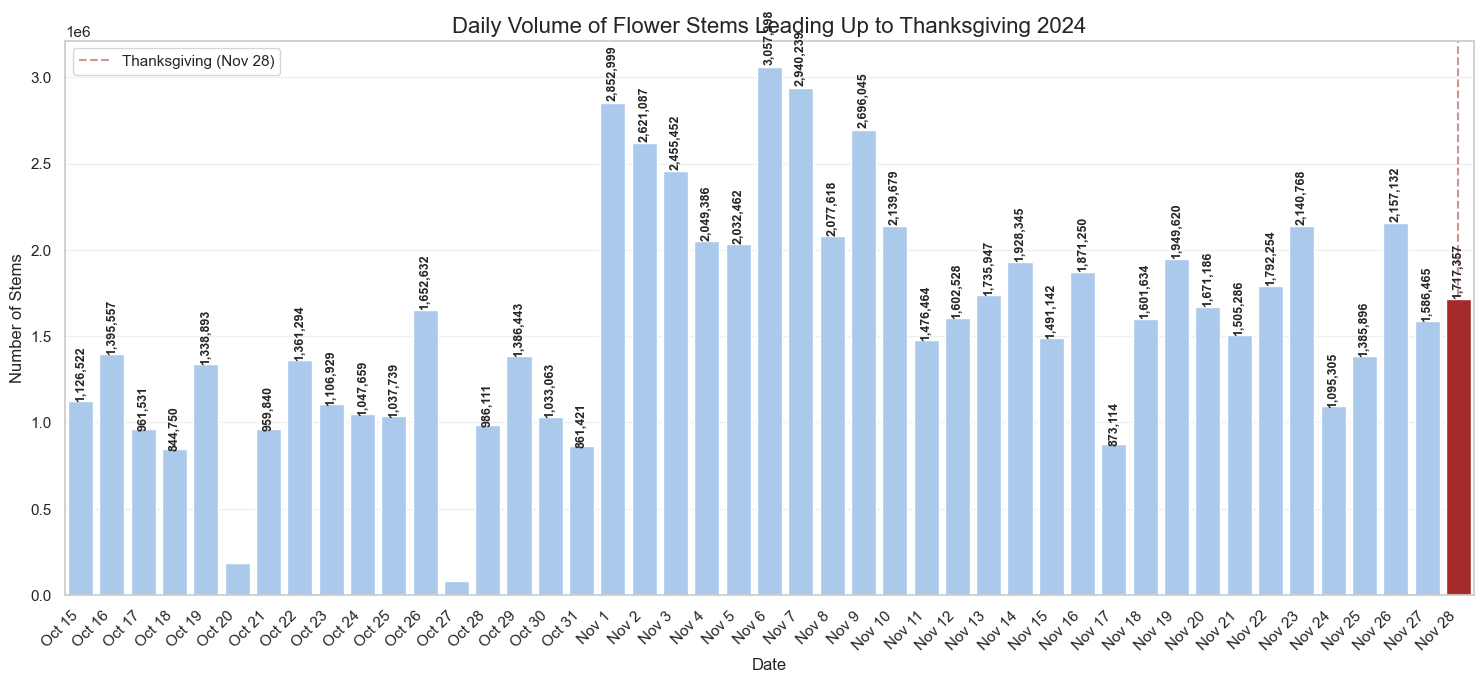

In [18]:
# Filter data for the period from October 15 to November 28, 2024 (Thanksgiving)
thanksgiving_period_2024 = df[(df['Year'] == 2024) & 
                           ((df['Month'] == 10) & (df['Day'] >= 15)) | 
                           ((df['Month'] == 11) & (df['Day'] <= 28))]

# Find the exact date of Thanksgiving 2024
thanksgiving_date = None
for date in holiday_dates_by_name['thanksgiving']:
    if date.year == 2024:
        thanksgiving_date = date
        break

# Group by date and sum the Stems
daily_stems_thanksgiving = thanksgiving_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_thanksgiving['date'] = pd.to_datetime('2024-' + 
                                             daily_stems_thanksgiving['Month'].astype(str).str.zfill(2) + '-' + 
                                             daily_stems_thanksgiving['Day'].astype(str).str.zfill(2))
daily_stems_thanksgiving = daily_stems_thanksgiving.sort_values('date')

# Plot the daily volume of stems during the Thanksgiving period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_thanksgiving)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_thanksgiving['date']]
plt.xticks(range(len(daily_stems_thanksgiving)), date_labels, rotation=45, ha='right')

# Highlight Thanksgiving Day
if thanksgiving_date:
    thanksgiving_idx = daily_stems_thanksgiving[
        (daily_stems_thanksgiving['Month'] == thanksgiving_date.month) & 
        (daily_stems_thanksgiving['Day'] == thanksgiving_date.day)
    ].index
    
    if not thanksgiving_idx.empty:
        thanksgiving_idx = thanksgiving_idx[0]
        ax.patches[thanksgiving_idx].set_facecolor('brown')

# Add text labels for significant peaks
for i, v in enumerate(daily_stems_thanksgiving['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Thanksgiving 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Thanksgiving Day
if thanksgiving_date and isinstance(thanksgiving_idx, (int, np.integer)):
    plt.axvline(x=thanksgiving_idx, color='brown', linestyle='--', alpha=0.5, label="Thanksgiving (Nov 28)")

plt.legend()
plt.tight_layout()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_9452\2089579249.py:57: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


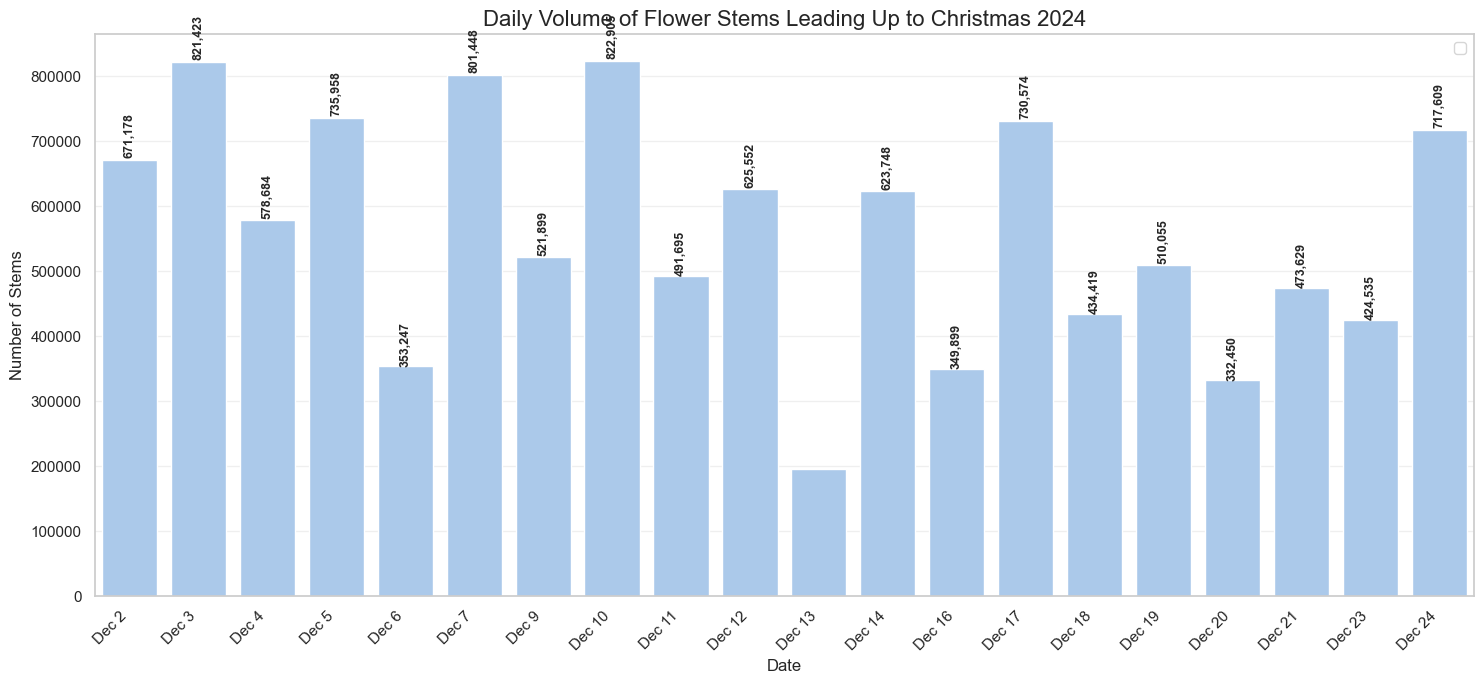

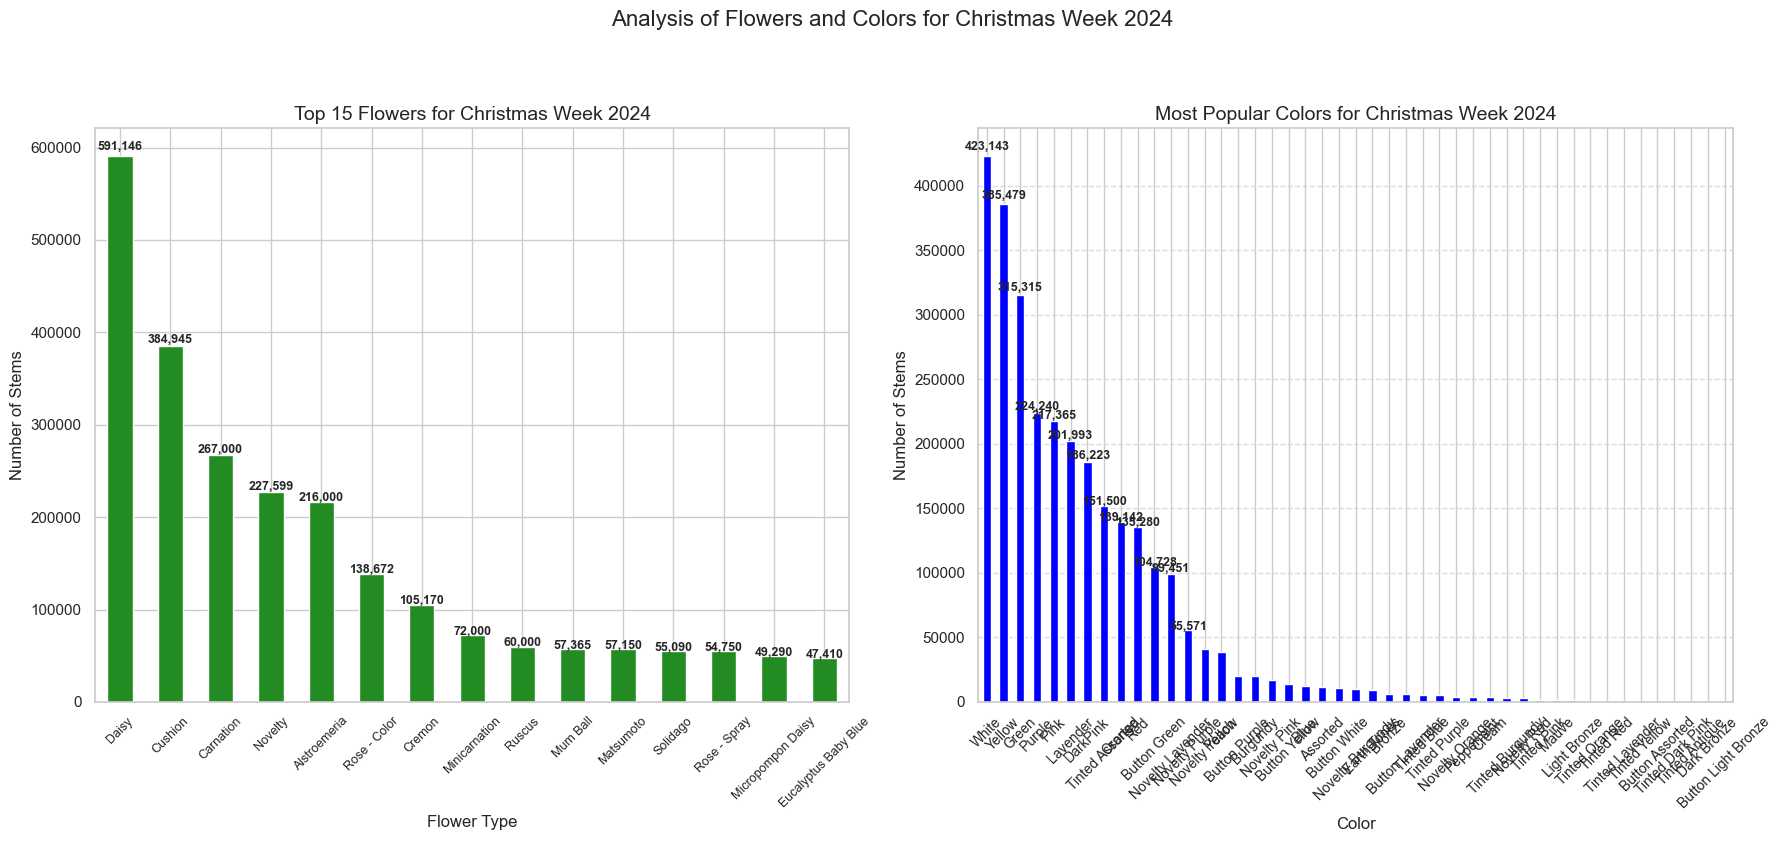

In [20]:
# Filter data for the period from December 1 to December 25, 2024 (Christmas)
christmas_period_2024 = df[(df['Year'] == 2024) & 
                         (df['Month'] == 12) & 
                         (df['Day'] <= 25)]

# Find the exact date of Christmas 2024
christmas_date = None
for date in holiday_dates_by_name['christmas']:
    if date.year == 2024:
        christmas_date = date
        break

# Group by date and sum the Stems
daily_stems_christmas = christmas_period_2024.groupby(['Month', 'Day'])['Stems'].sum().reset_index()

# Create a new date column for proper sorting
daily_stems_christmas['date'] = pd.to_datetime('2024-' + 
                                          daily_stems_christmas['Month'].astype(str).str.zfill(2) + '-' + 
                                          daily_stems_christmas['Day'].astype(str).str.zfill(2))
daily_stems_christmas = daily_stems_christmas.sort_values('date')

# Plot the daily volume of stems during the Christmas period
plt.figure(figsize=(15, 7))
ax = sns.barplot(x='date', y='Stems', data=daily_stems_christmas)

# Format x-axis labels
date_labels = [f"{d.month_name()[:3]} {d.day}" for d in daily_stems_christmas['date']]
plt.xticks(range(len(daily_stems_christmas)), date_labels, rotation=45, ha='right')

# Highlight Christmas Day
if christmas_date:
    christmas_idx = daily_stems_christmas[
        (daily_stems_christmas['Month'] == christmas_date.month) & 
        (daily_stems_christmas['Day'] == christmas_date.day)
    ].index
    
    if not christmas_idx.empty:
        christmas_idx = christmas_idx[0]
        ax.patches[christmas_idx].set_facecolor('darkgreen')

# Add text labels for significant peaks
for i, v in enumerate(daily_stems_christmas['Stems']):
    if v > 300000:  # Only label significant peaks
        ax.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', rotation=90, fontsize=9)

# Set titles and labels
plt.title('Daily Volume of Flower Stems Leading Up to Christmas 2024', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Stems', fontsize=12)
plt.grid(axis='y', alpha=0.3)

# Draw a vertical line at Christmas Day
if christmas_date and isinstance(christmas_idx, (int, np.integer)):
    plt.axvline(x=christmas_idx, color='darkgreen', linestyle='--', alpha=0.5, label="Christmas (Dec 25)")

# Add a secondary analysis: most popular flowers and colors for Christmas
plt.legend()
plt.tight_layout()
plt.show()

# Analyze top flowers and colors used for Christmas
# Since there's no data for Christmas Day itself, let's use the week before Christmas (Dec 18-24)
christmas_week_data = christmas_period_2024[(christmas_period_2024['Month'] == 12) & 
                                          (christmas_period_2024['Day'] >= 18) & 
                                          (christmas_period_2024['Day'] <= 24)]

# Create a figure with two subplots for the analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Top 15 flowers for Christmas
stems_by_flower_christmas = christmas_week_data.groupby('Flower')['Stems'].sum().sort_values(ascending=False)
top_flowers_christmas = stems_by_flower_christmas.head(15)
top_flowers_christmas.plot(kind='bar', color='forestgreen', ax=ax1)
ax1.set_title("Top 15 Flowers for Christmas Week 2024", fontsize=14)
ax1.set_ylabel("Number of Stems")
ax1.set_xlabel("Flower Type")
ax1.tick_params(axis='x', rotation=45, labelsize=9)

# Top colors for Christmas
stems_by_color_christmas = christmas_week_data.groupby('Color')['Stems'].sum().sort_values(ascending=False)
stems_by_color_christmas.plot(kind='bar', colormap='winter', ax=ax2)
ax2.set_title("Most Popular Colors for Christmas Week 2024", fontsize=14)
ax2.set_ylabel("Number of Stems")
ax2.set_xlabel("Color")
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.tick_params(axis='x', rotation=45, labelsize=10)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Add labels to the bars for the top values
for i, v in enumerate(top_flowers_christmas):
    if v > 20000:
        ax1.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

for i, v in enumerate(stems_by_color_christmas):
    if v > 50000:
        ax2.text(i, v + v*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=9)

plt.suptitle("Analysis of Flowers and Colors for Christmas Week 2024", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()